# Student Adaptivity Analysis

# To get an idea about the effectiveness of online education

## During the Covid-19 phase everything went on the online platform even the education system. Students whole education was completely on the online mode. This project shows how the students were able to adapt the online mode of education based on several factors taken into consideration. So the outcome is Prediction of Students Adaptivity Level in Online Education using Machine Learning Model

In [28]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
data = pd.read_csv(r"C:\Users\Jay Rathod\Downloads\student adaptibility\students_adaptability_level_online_education.csv")
data.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low


# Performing EDA

In [3]:
data.describe(include="all")

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
count,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205
unique,2,6,3,2,2,2,2,3,2,3,3,2,3,3
top,Boy,21-25,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
freq,663,374,530,823,901,935,1004,878,695,775,840,995,1013,625


In [4]:
data.shape

(1205, 14)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               1205 non-null   object
 1   Age                  1205 non-null   object
 2   Education Level      1205 non-null   object
 3   Institution Type     1205 non-null   object
 4   IT Student           1205 non-null   object
 5   Location             1205 non-null   object
 6   Load-shedding        1205 non-null   object
 7   Financial Condition  1205 non-null   object
 8   Internet Type        1205 non-null   object
 9   Network Type         1205 non-null   object
 10  Class Duration       1205 non-null   object
 11  Self Lms             1205 non-null   object
 12  Device               1205 non-null   object
 13  Adaptivity Level     1205 non-null   object
dtypes: object(14)
memory usage: 131.9+ KB


In [6]:
for i in data.columns:
    print({i: data[i].unique()})

{'Gender': array(['Boy', 'Girl'], dtype=object)}
{'Age': array(['21-25', '16-20', '11-15', '26-30', '6-10', '1-5'], dtype=object)}
{'Education Level': array(['University', 'College', 'School'], dtype=object)}
{'Institution Type': array(['Non Government', 'Government'], dtype=object)}
{'IT Student': array(['No', 'Yes'], dtype=object)}
{'Location': array(['Yes', 'No'], dtype=object)}
{'Load-shedding': array(['Low', 'High'], dtype=object)}
{'Financial Condition': array(['Mid', 'Poor', 'Rich'], dtype=object)}
{'Internet Type': array(['Wifi', 'Mobile Data'], dtype=object)}
{'Network Type': array(['4G', '3G', '2G'], dtype=object)}
{'Class Duration': array(['3-6', '1-3', '0'], dtype=object)}
{'Self Lms': array(['No', 'Yes'], dtype=object)}
{'Device': array(['Tab', 'Mobile', 'Computer'], dtype=object)}
{'Adaptivity Level': array(['Moderate', 'Low', 'High'], dtype=object)}


# Percentage of Adaptivity level

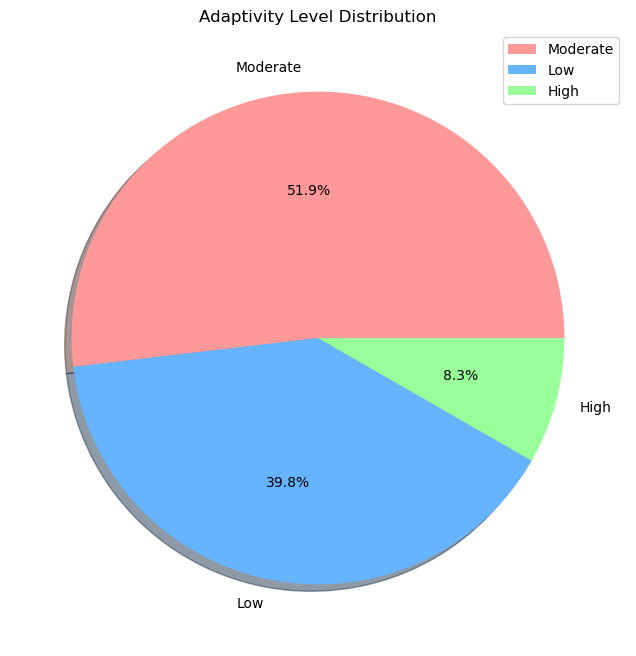

In [7]:
# Define the color palette
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

# Create the pie chart
plt.figure(figsize=(8,8))
data['Adaptivity Level'].value_counts().plot(kind='pie', autopct='%1.1f%%', shadow=True, colors=colors)

# Add labels
plt.title('Adaptivity Level Distribution')
plt.ylabel('')
plt.legend(labels=data['Adaptivity Level'].value_counts().index, loc='best')

# Show the plot
plt.show()


### As it is clearly visible that the High Adaptivity Class is less than compare to other classes 


#### Hence there is a possibility for use of Synthetic Minority Sampling Technique

# Percentage of Gender

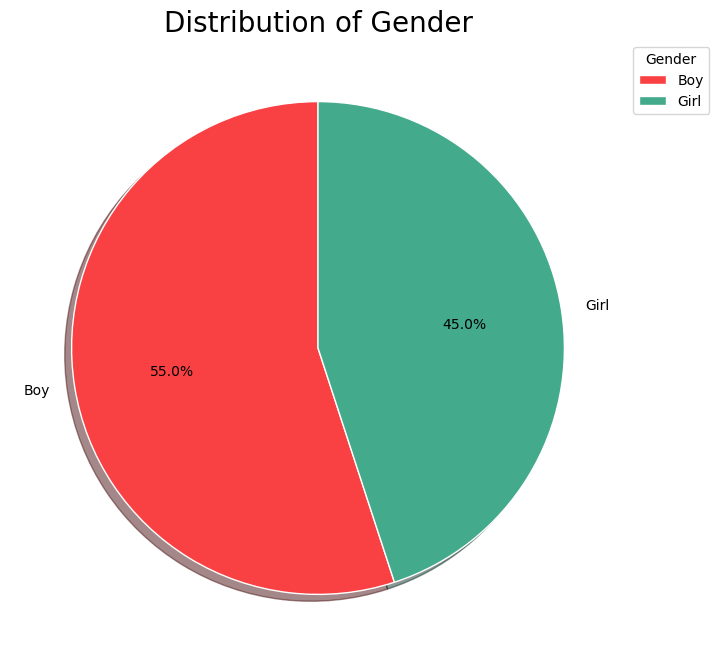

In [10]:
import matplotlib.pyplot as plt

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 8))

# Define colors for the pie chart slices
colors = ['#F94144', '#43AA8B', '#577590']

# Create the pie chart
data['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', shadow=True,
                                   startangle=90, ax=ax, colors=colors,
                                   wedgeprops={'linewidth': 1, 'edgecolor': 'white'})

# Set the title and legend
ax.set_title("Distribution of Gender", fontsize=20)
ax.legend(title='Gender', loc='upper left', bbox_to_anchor=(1, 0, 0.5, 1))

# Remove the y-axis label and ticks
ax.set_ylabel('')
ax.tick_params(axis='y', which='both', length=0)

# Set the aspect ratio to 'equal' for a circular pie chart
ax.set(aspect='equal')

# Display the chart
plt.show()


### The gender  value counts is almost balanced

# Percentage of Device

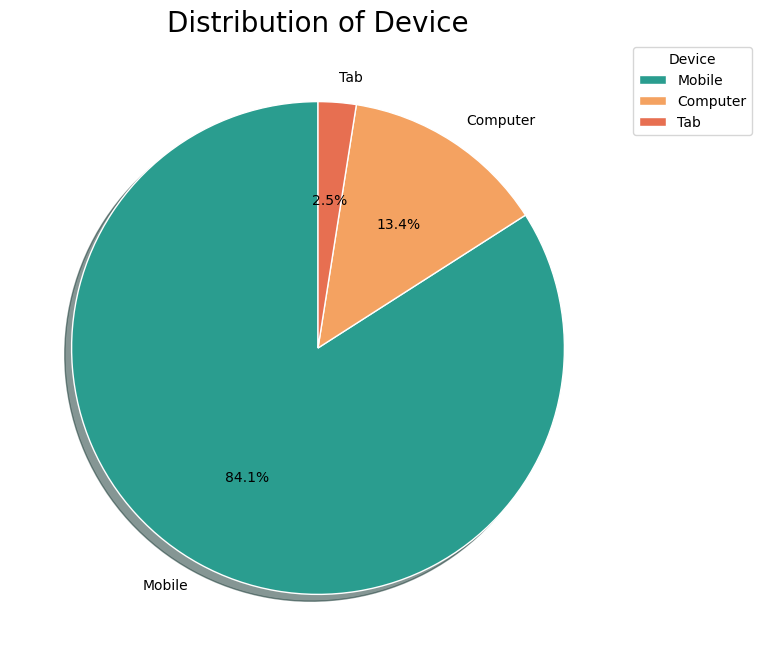

In [12]:
import matplotlib.pyplot as plt

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 8))

# Define colors for the pie chart slices
colors = ['#2A9D8F', '#F4A261', '#E76F51']

# Create the pie chart
data['Device'].value_counts().plot(kind='pie', autopct='%1.1f%%', shadow=True,
                                    startangle=90, ax=ax, colors=colors,
                                    wedgeprops={'linewidth': 1, 'edgecolor': 'white'})

# Set the title and legend
ax.set_title("Distribution of Device", fontsize=20)
ax.legend(title='Device', loc='upper left', bbox_to_anchor=(1, 0, 0.5, 1))

# Remove the y-axis label and ticks
ax.set_ylabel('')
ax.tick_params(axis='y', which='both', length=0)

# Set the aspect ratio to 'equal' for a circular pie chart
ax.set(aspect='equal')

# Display the chart
plt.show()


## The device used by students is mostly mobile 

# Showing the effect of Institution Type in Adaptivity Level using in Dataset

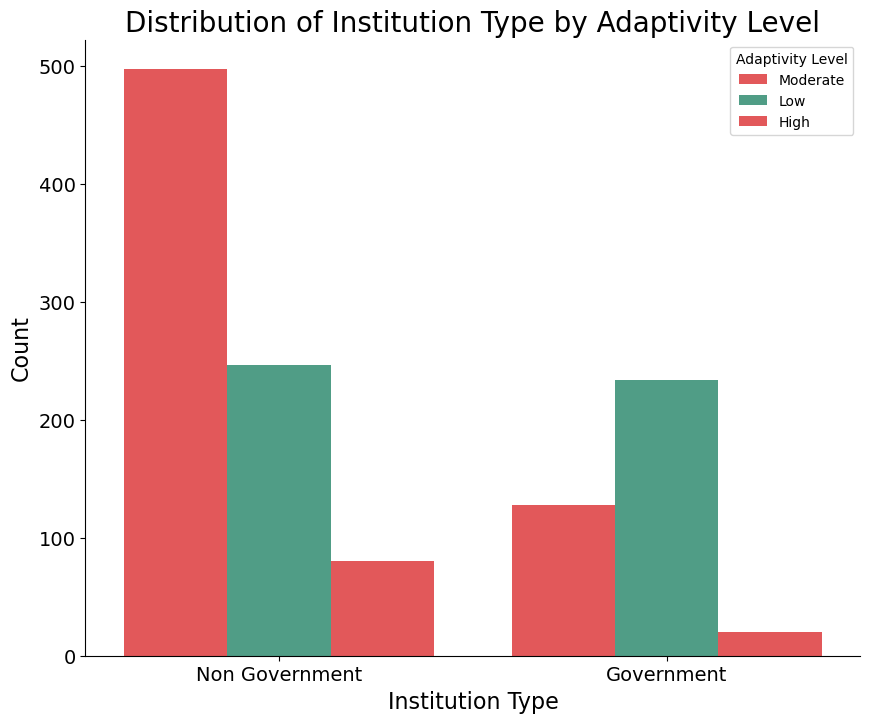

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 8))

# Define colors for the plot
colors = ['#F94144', '#43AA8B']

# Create the countplot
sns.countplot(x='Institution Type', hue='Adaptivity Level', data=data, palette=colors, ax=ax)

# Set the title and legend
ax.set_title("Distribution of Institution Type by Adaptivity Level", fontsize=20)
ax.legend(title='Adaptivity Level', loc='upper right')

# Customize the x-axis label and tick labels
ax.set_xlabel('Institution Type', fontsize=16)
ax.tick_params(axis='x', labelsize=14)

# Customize the y-axis label and tick labels
ax.set_ylabel('Count', fontsize=16)
ax.tick_params(axis='y', labelsize=14)

# Remove the top and right spines
sns.despine()

# Display the chart
plt.show()


## This graph explains two things 

## First is that the data mostly consist of students studying in Non-Government based Institutions

## Secondly  the Non - Government students are mostly Moderate in Adaptivity Level whereas in Government Institutions the Low Adaptivity Class  is more dominant

# Show the effect Financial Condition in Adaptivity Level using in Dataset

C:\Users\Jay Rathod\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Financial Condition', ylabel='count'>

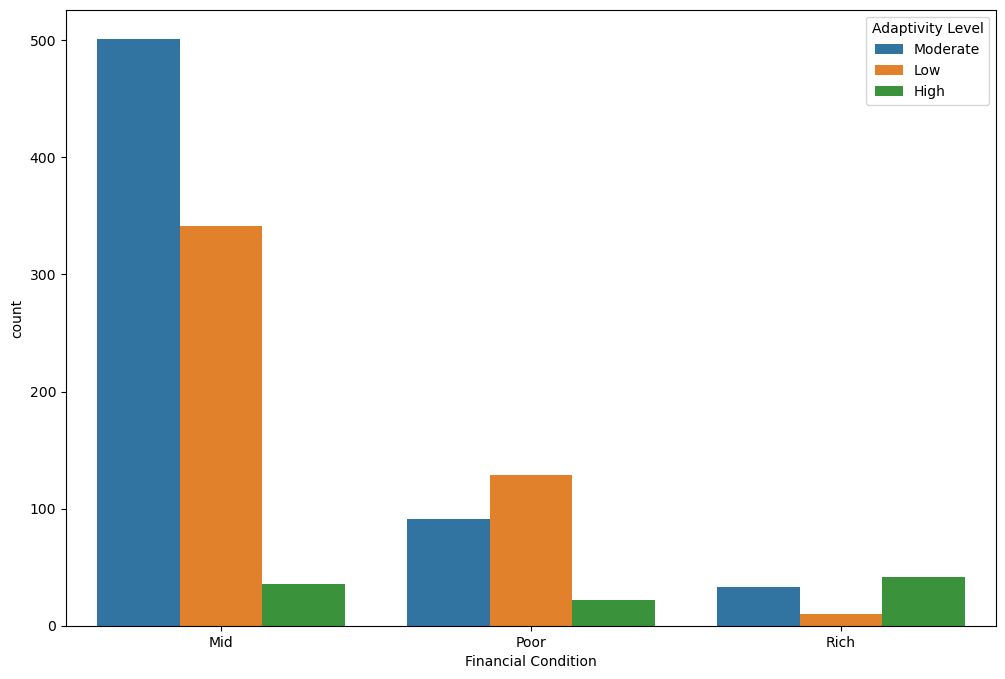

In [11]:
plt.figure(figsize=(12,8))
sns.countplot(data["Financial Condition"],hue=data["Adaptivity Level"])

## Most of the data consists of Finanical Condition Middle Class 
# Also the Students in Rich Category have mostly High Adaptivity whereas for poor category has more Low adaptivity level 


# Show the effect Gender in Adaptivity Level using in Dataset

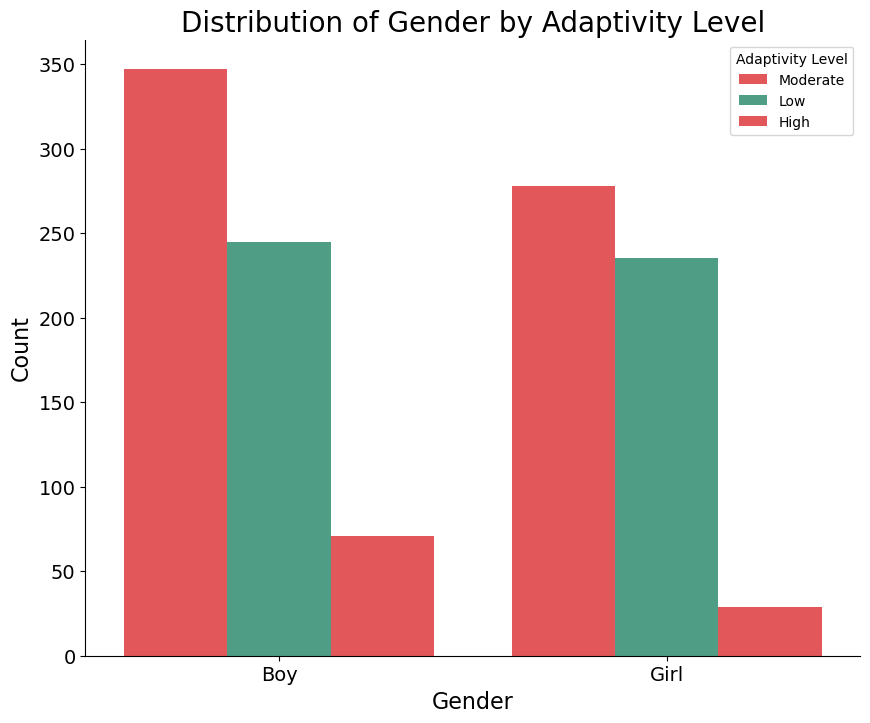

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 8))

# Define colors for the plot
colors = ['#F94144', '#43AA8B']

# Create the countplot
sns.countplot(x='Gender', hue='Adaptivity Level', data=data, palette=colors, ax=ax)

# Set the title and legend
ax.set_title("Distribution of Gender by Adaptivity Level", fontsize=20)
ax.legend(title='Adaptivity Level', loc='upper right')

# Customize the x-axis label and tick labels
ax.set_xlabel('Gender', fontsize=16)
ax.tick_params(axis='x', labelsize=14)

# Customize the y-axis label and tick labels
ax.set_ylabel('Count', fontsize=16)
ax.tick_params(axis='y', labelsize=14)

# Remove the top and right spines
sns.despine()

# Display the chart
plt.show()


### As we know the genders are equal in their counts 
### By looking at this plot we can say that the High Adaptivity level for Girls is less compared to Boys
### The Low category is almost same for both the Genders

# Show the effect Network Type in Adaptivity Level using in Dataset

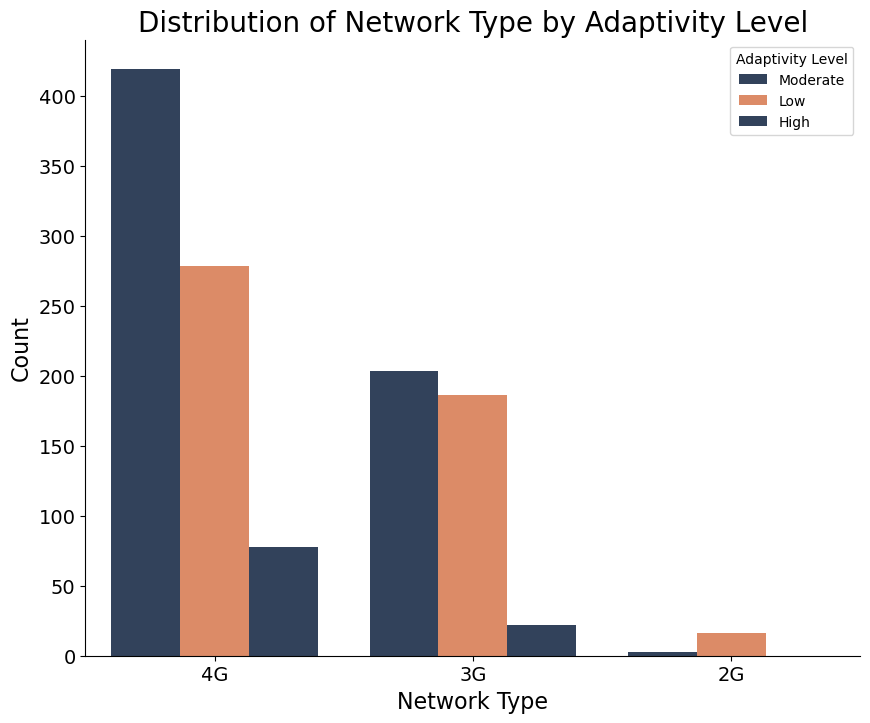

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define custom colors
colors = ['#2B4162', '#EF8354']

# Create the plot
plt.figure(figsize=(10, 8))
sns.countplot(x='Network Type', hue='Adaptivity Level', data=data, palette=colors)

# Set the title and legend
plt.title("Distribution of Network Type by Adaptivity Level", fontsize=20)
plt.legend(title='Adaptivity Level', loc='upper right')

# Customize the x-axis label and tick labels
plt.xlabel('Network Type', fontsize=16)
plt.xticks(fontsize=14)

# Customize the y-axis label and tick labels
plt.ylabel('Count', fontsize=16)
plt.yticks(fontsize=14)

# Remove the top and right spines
sns.despine()

# Show the plot
plt.show()


## Here we can clearly nobody uses 2G anymore here 
## And students having 4G and 3G have almost same spread over Classes considering their counts

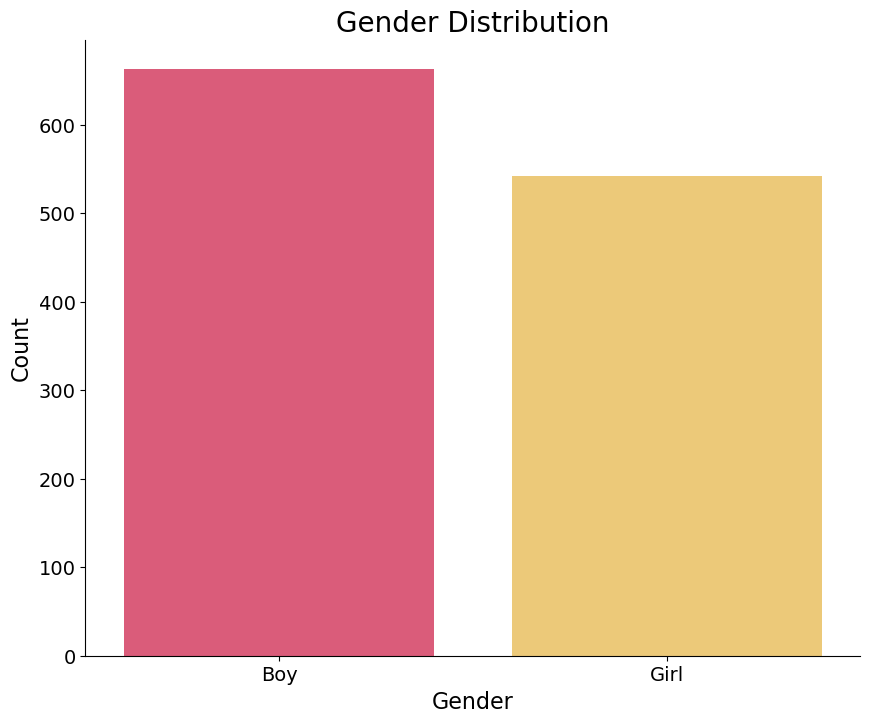

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 8))

# Define colors for the plot
colors = ['#EF476F', '#FFD166', '#06D6A0']

# Create the countplot
sns.countplot(x='Gender', data=data, palette=colors, ax=ax)

# Set the title
ax.set_title("Gender Distribution", fontsize=20)

# Customize the x-axis label and tick labels
ax.set_xlabel('Gender', fontsize=16)
ax.tick_params(axis='x', labelsize=14)

# Customize the y-axis label and tick labels
ax.set_ylabel('Count', fontsize=16)
ax.tick_params(axis='y', labelsize=14)

# Remove the top and right spines
sns.despine()

# Display the chart
plt.show()


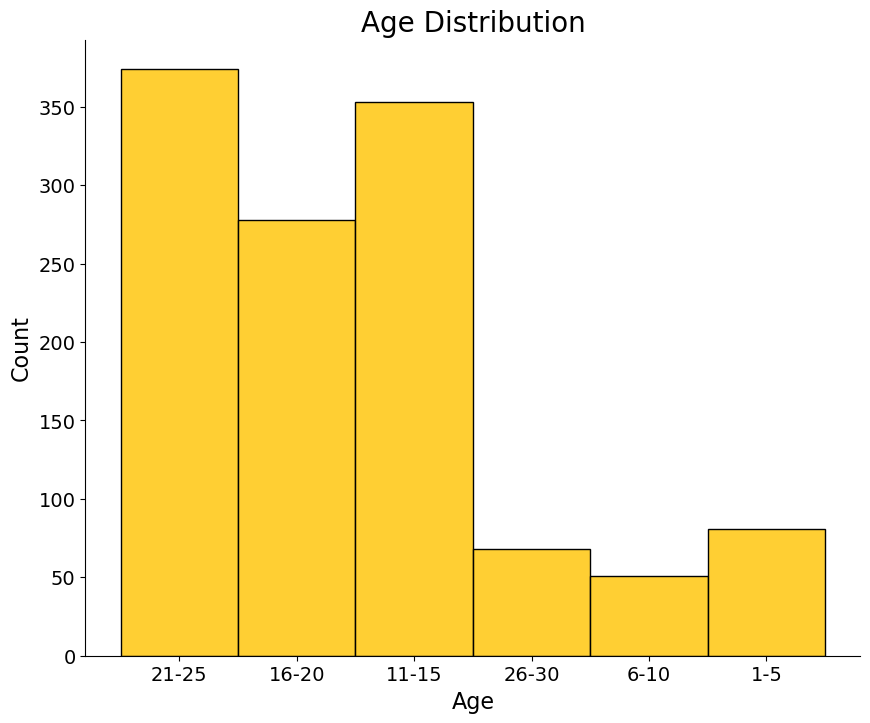

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 8))

# Define colors for the plot
colors = ['#FFC300']

# Create the histogram
sns.histplot(x='Age', data=data, bins=10, color=colors[0], alpha=0.8, ax=ax)

# Set the title
ax.set_title("Age Distribution", fontsize=20)

# Customize the x-axis label and tick labels
ax.set_xlabel('Age', fontsize=16)
ax.tick_params(axis='x', labelsize=14)

# Customize the y-axis label and tick labels
ax.set_ylabel('Count', fontsize=16)
ax.tick_params(axis='y', labelsize=14)

# Remove the top and right spines
sns.despine()

# Display the chart
plt.show()


### The data has students ranging ftom 1-30 and the age Groups 21-25 and 11-15 have most values

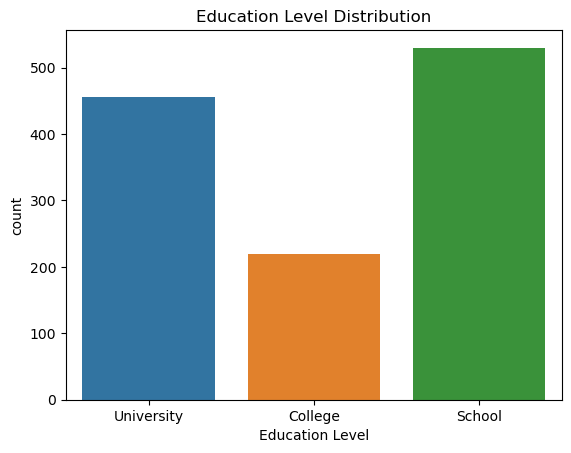

In [19]:
# Count plot of Education Level

sns.countplot(x='Education Level', data=data)
plt.title('Education Level Distribution')
plt.show()

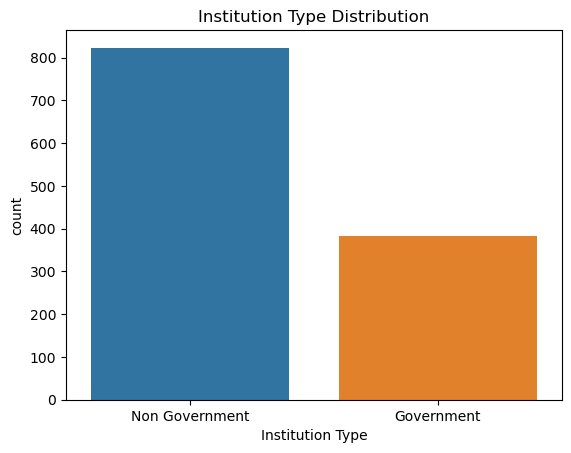

In [20]:
# Count plot for visualization

sns.countplot(x='Institution Type', data=data)
plt.title('Institution Type Distribution')
plt.show()

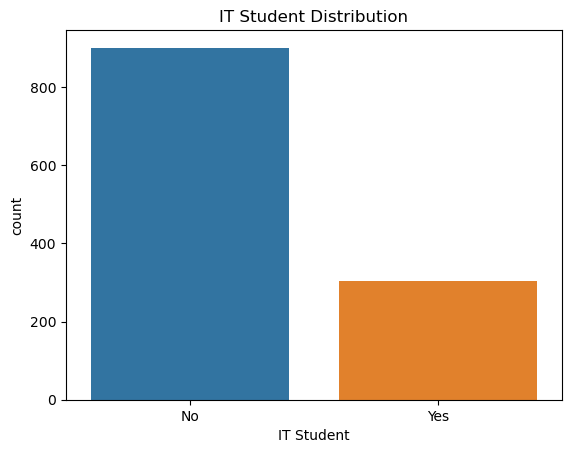

In [25]:
# Count plot for IT Students

sns.countplot(x='IT Student', data=data)
plt.title('IT Student Distribution')
plt.show()

# Most of students are not of IT field 

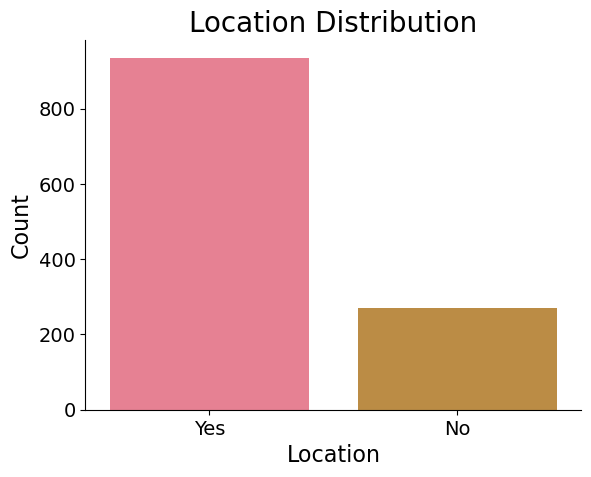

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the color palette
colors = sns.color_palette('husl', 8)

# Create the count plot with the custom color palette
sns.countplot(x='Location', data=data, palette=colors)

# Set the title
plt.title("Location Distribution", fontsize=20)

# Customize the x-axis label and tick labels
plt.xlabel('Location', fontsize=16)
plt.xticks(fontsize=14)

# Customize the y-axis label and tick labels
plt.ylabel('Count', fontsize=16)
plt.yticks(fontsize=14)

# Remove the top and right spines
sns.despine()

# Display the chart
plt.show()


# Count plot for load shedding

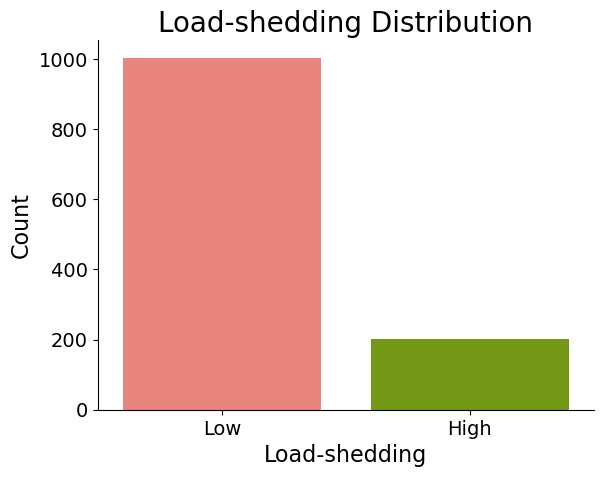

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the custom color palette
colors = ['#F8766D', '#7CAE00']

# Create the count plot with the custom color palette
sns.countplot(x='Load-shedding', data=data, palette=colors)

# Set the title
plt.title('Load-shedding Distribution', fontsize=20)

# Customize the x-axis label and tick labels
plt.xlabel('Load-shedding', fontsize=16)
plt.xticks(fontsize=14)

# Customize the y-axis label and tick labels
plt.ylabel('Count', fontsize=16)
plt.yticks(fontsize=14)

# Remove the top and right spines
sns.despine()

# Display the chart
plt.show()


# Load Shedding is power consumption while studying online using mobile or pc or tablets

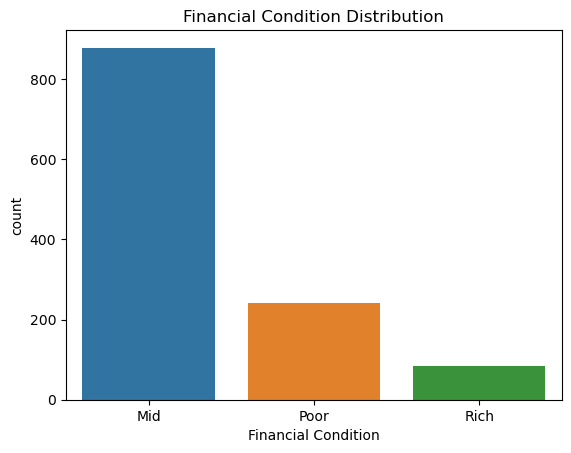

In [24]:
# Count plot for financial condition

sns.countplot(x='Financial Condition', data=data)
plt.title('Financial Condition Distribution')
plt.show()

# Most of the students are from middle class family and very few are from rich class

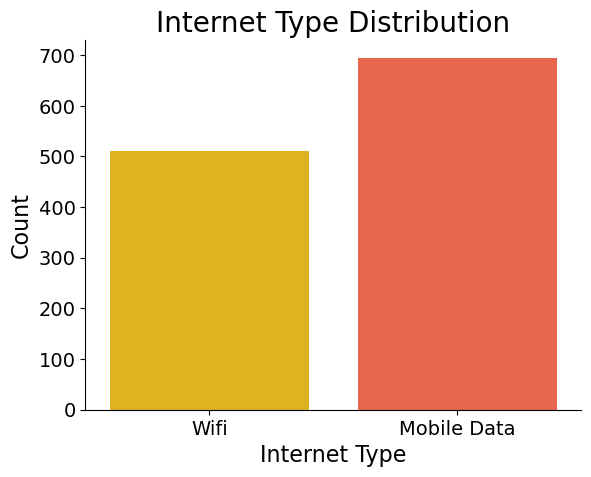

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a custom color palette
colors = ['#FFC300', '#FF5733', '#C70039']

# Create the count plot with the custom color palette
sns.countplot(x='Internet Type', data=data, palette=colors)

# Set the title
plt.title('Internet Type Distribution', fontsize=20)

# Customize the x-axis label and tick labels
plt.xlabel('Internet Type', fontsize=16)
plt.xticks(fontsize=14)

# Customize the y-axis label and tick labels
plt.ylabel('Count', fontsize=16)
plt.yticks(fontsize=14)

# Remove the top and right spines
sns.despine()

# Display the chart
plt.show()


### Students prefer using Mobile Data or They dont have Wi Fi

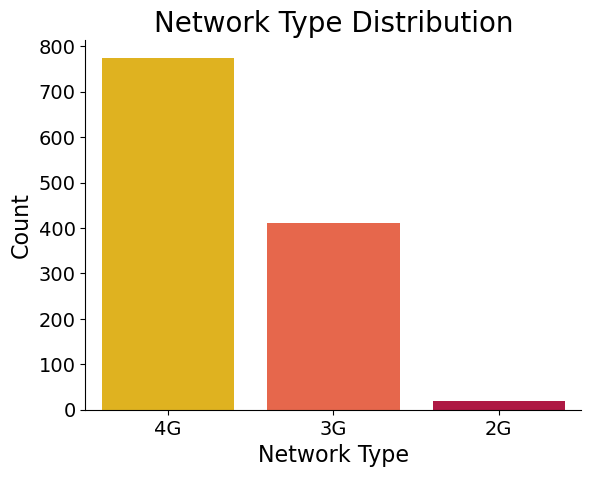

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a custom color palette
colors = ['#FFC300', '#FF5733', '#C70039', '#900C3F']

# Create the count plot with the custom color palette
sns.countplot(x='Network Type', data=data, palette=colors)

# Set the title
plt.title('Network Type Distribution', fontsize=20)

# Customize the x-axis label and tick labels
plt.xlabel('Network Type', fontsize=16)
plt.xticks(fontsize=14)

# Customize the y-axis label and tick labels
plt.ylabel('Count', fontsize=16)
plt.yticks(fontsize=14)

# Remove the top and right spines
sns.despine()

# Display the chart
plt.show()


# Most of the student are using 4G 

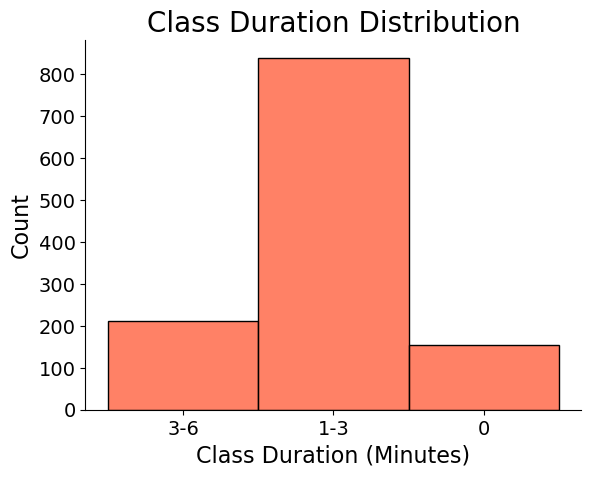

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the histogram with a custom color
sns.histplot(x='Class Duration', data=data, bins=10, color='#FF5733')

# Set the title
plt.title('Class Duration Distribution', fontsize=20)

# Customize the x-axis label and tick labels
plt.xlabel('Class Duration (Minutes)', fontsize=16)
plt.xticks(fontsize=14)

# Customize the y-axis label and tick labels
plt.ylabel('Count', fontsize=16)
plt.yticks(fontsize=14)

# Remove the top and right spines
sns.despine()

# Display the chart
plt.show()


# Class duration is 1 to 3 hours

### The Duration of Class is around 1 to 3 hours for majority of records

# Count plot for Self LMS

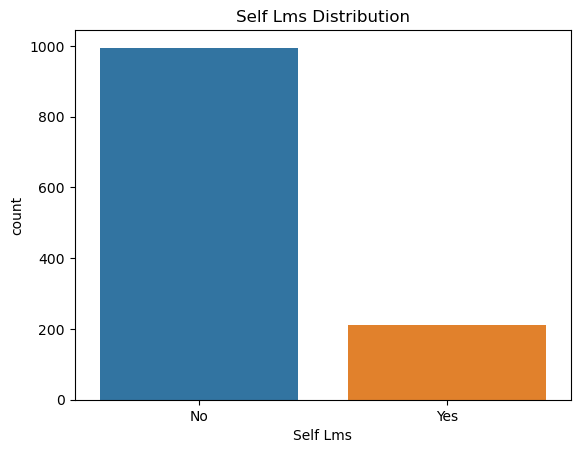

In [28]:
sns.countplot(x='Self Lms', data=data)
plt.title('Self Lms Distribution')
plt.show()

# Most of the student are not learning on their own

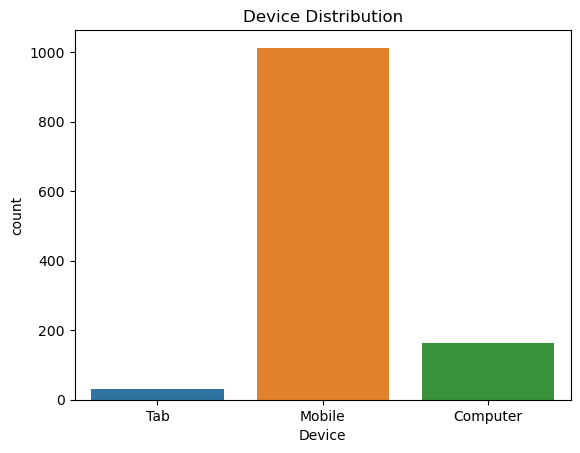

In [30]:
# Count plot for Devices

sns.countplot(x='Device', data=data)
plt.title('Device Distribution')
plt.show()

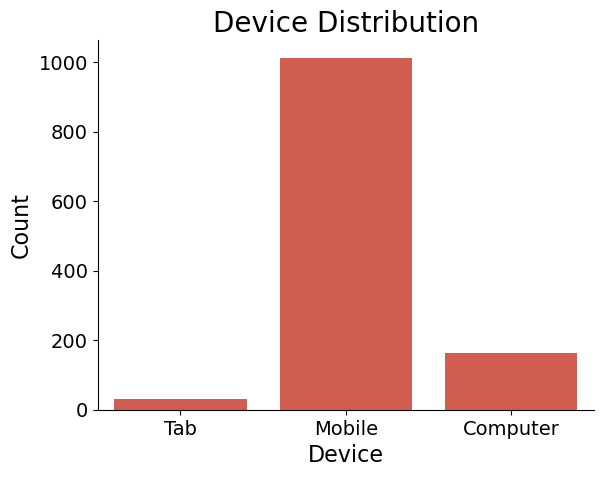

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the count plot with a custom color
sns.countplot(x='Device', data=data, color='#E74C3C')

# Set the title
plt.title('Device Distribution', fontsize=20)

# Customize the x-axis label and tick labels
plt.xlabel('Device', fontsize=16)
plt.xticks(fontsize=14)

# Customize the y-axis label and tick labels
plt.ylabel('Count', fontsize=16)
plt.yticks(fontsize=14)

# Remove the top and right spines
sns.despine()

# Display the chart
plt.show()


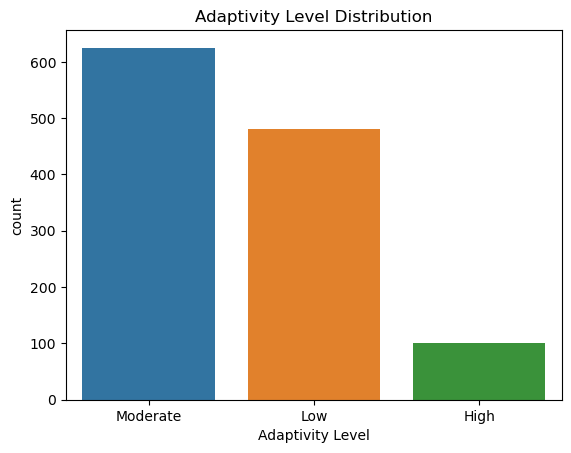

In [31]:
# Count plot for Adaptivity level

sns.countplot(x='Adaptivity Level', data=data)
plt.title('Adaptivity Level Distribution')
plt.show()

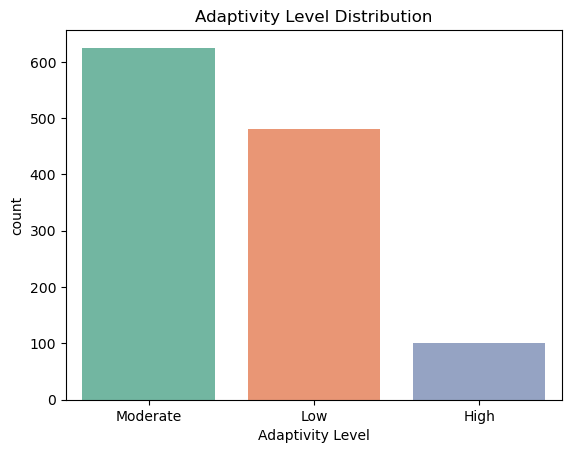

In [45]:
sns.countplot(x='Adaptivity Level', data=data, palette='Set2')
plt.title('Adaptivity Level Distribution')
plt.show()

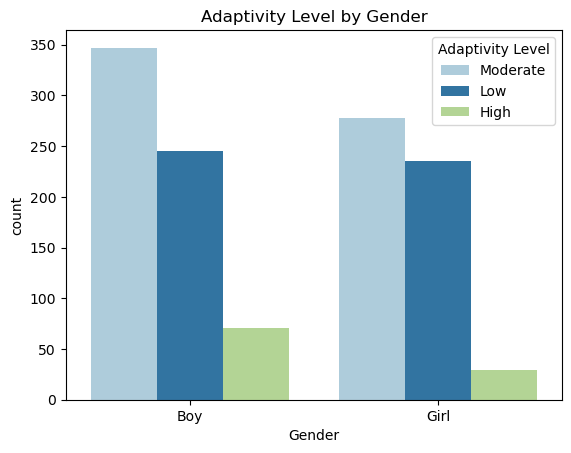

In [46]:
sns.countplot(x='Gender', hue='Adaptivity Level', data=data, palette='Paired')
plt.title('Adaptivity Level by Gender')
plt.show()


# Boys have more adaptivity compared to girls

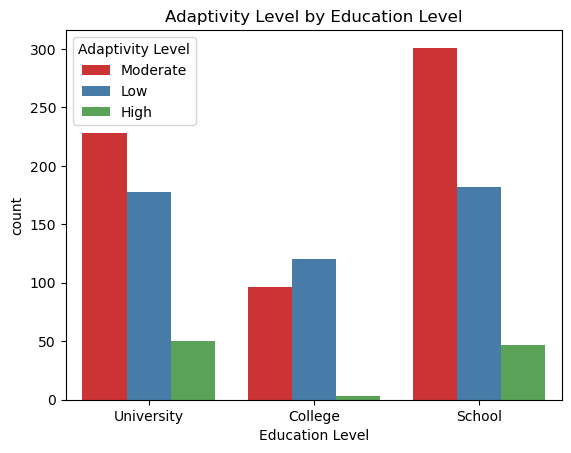

In [47]:
sns.countplot(x='Education Level', hue='Adaptivity Level', data=data, palette='Set1')
plt.title('Adaptivity Level by Education Level')
plt.show()


# Most of the students are from school and their adaptivity level is high as compared to University and College Level

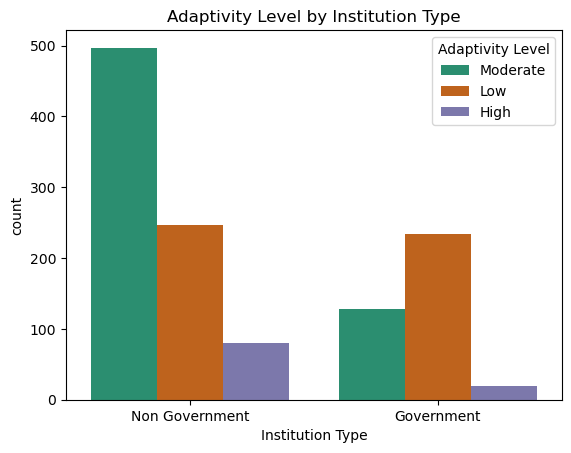

In [48]:
sns.countplot(x='Institution Type', hue='Adaptivity Level', data=data, palette='Dark2')
plt.title('Adaptivity Level by Institution Type')
plt.show()


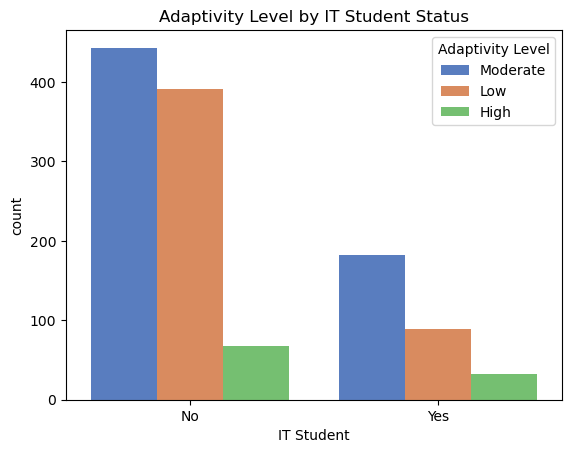

In [49]:
sns.countplot(x='IT Student', hue='Adaptivity Level', data=data, palette='muted')
plt.title('Adaptivity Level by IT Student Status')
plt.show()


# Most of the students are from non technical background

In [24]:
!pip install pandas-profiling

     -------------------------------------- 324.4/324.4 kB 5.0 MB/s eta 0:00:00
     ------------------------------------- 345.9/345.9 kB 10.8 MB/s eta 0:00:00
     -------------------------------------- 296.5/296.5 kB 9.2 MB/s eta 0:00:00
     -------------------------------------- 102.7/102.7 kB 6.2 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ------------------------------------- 663.5/663.5 kB 21.1 MB/s eta 0:00:00
     ---------------------------------------- 4.7/4.7 MB 33.5 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27082 sha256=e3e9e65df53e5763959a1eebf82baeb7ac3278473cbcf5503bc8f4b52825460b
  Stored in directory: c:\users\jay rathod\appdata\local\pip\cache\wheels\1d\05\04\c6d7d3b66539d9e659ac6dfe81e2d0fd4c1a8316cc5a403300
Successfully built htmlmin


In [25]:
from ydata_profiling import ProfileReport

In [26]:
profile = ProfileReport(data,explorative=True)

In [27]:
profile.to_file("output.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]